In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Laboratorio / Clase 3 Procesamiento de señales 2020


In [38]:
def easydualplot(x,y,labelx='x[n]',labely='y[n]',labeln='n'):
    fig, ax = plt.subplots(2)
    ax[0].stem(x)
    ax[0].set_xlabel(labeln)
    ax[0].set_ylabel(labelx)
    ax[1].stem(y)
    ax[1].set_xlabel(labeln)
    ax[1].set_ylabel(labely)
    plt.show()

## Sistema discreto en el tiempo
Un **sistema** discreto en el tiempo $T\{.\}$ opera sobre una sucesión de entrada $x(n)$ convirtiendola en una sucesion de salida $y(n)=T\{x(n)\}$:

$$x(n)\rightarrow \fbox{T\{.\}} \rightarrow y(n)=T\{x(n)\}$$


### Ejemplo 1

**Sistema retardador**: retrasa la señalo $d$ unidades.

$$y(n)=x(n-d)$$

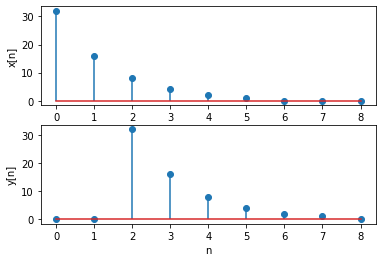

In [75]:
x=[32,16,8,4,2,1,0,0,0] # TRAMPA (últimas muestras 0)
d=2
y=[]
for n in range(len(x)):
    y.append(x[n-d]) 
    
easydualplot(x,y,labelx='x[n]',labely='y[n]',labeln='n')

### Ejemplo 2

**Sistema sumador:** suma las muestras de la señal en una ventana de tiempo finito

$$y(n)=\sum_{k=-N_1}^{N_2} x(n+k)$$

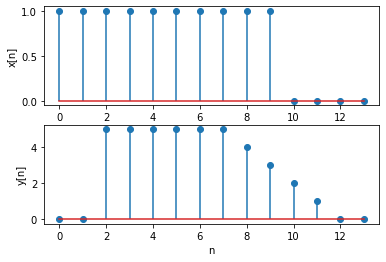

In [76]:
x=[1,1,1,1,1,1,1,1,1,1,0,0,0,0]
y=[]
N1=2
N2=2
for n in range(len(x)):
    y.append(np.sum(x[n-N1:n+N2+1]))
    
easydualplot(x,y,labelx='x[n]',labely='y[n]',labeln='n')

### Ejemplo 3

**Sistema Rectificador:** obtiene el modulo de la señal de entrada

$$y(n)=\sqrt{x^2(n)}$$

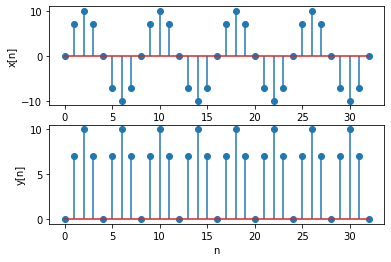

In [74]:
t=np.linspace(0,4*np.pi,33)
x=10*np.sin(2*t)
y=np.abs(x)

easydualplot(x,y,labelx='x[n]',labely='y[n]',labeln='n')

## Sistema discreto en el tiempo Propiedades/Clasificación

## **Lineales - no lineales**

$$x_1(n)\rightarrow \fbox{T\{.\}} \rightarrow y_1(n)$$
$$x_2(n)\rightarrow \fbox{T\{.\}} \rightarrow y_2(n)$$
$$x_3(n)={\alpha}_1 x_1(n)+{\alpha}_2 x_2(n)\rightarrow \fbox{T\{.\}} \rightarrow y_3(n)={\alpha}_1 y_1(n)+{\alpha}_2 y_2(n)$$

siendo ${\alpha}_1$ y ${\alpha}_2$ constantes escalares

La salida de un sistema linal a una entrada nula es tambien nula

### Ejemplo
$y(n)=x(n-2)$

$x_1(n) \rightarrow y_1(n)=x_1(n-2)$

$x_2(n) \rightarrow y_2(n)=x_2(n-2)$

$x_3(n)={\alpha}_1 x_1(n)+{\alpha}_2 x_2(n)\rightarrow  y_3(n)=x_3(n-2)={\alpha}_1 x_1(n-2)+{\alpha}_2 x_2(n-2)$

## **Con memoria o sin memoria**

Un sistema discreto es **sin memoria** si la salida depende únicamente de **valores presentes** de la señal

### Ejemplo: con memoria

$$y(n)=x(n-3)$$
$$y(0)=x(-3)$$

$y(0)$ representa el momento presente y esta definido por una condicions pasada de la señal $x(-3)$

$$y(n)=\sum_{k=-\inf}^{n} x(k)$$

$$y(0)=\sum_{k=-\inf}^{0} x(k) =...+x(-2)+x(-1)+x(0)$$

$𝑦(0)$  representa la salida en momento presente y esta definido por condiones pasadas de la entrada $x(k)$ cuando $k$ en menor a $0$

### Ejemplo: sin memoria

$$ y(n)=log[x(n)]$$
$$ y(0)=log[x(0)]$$

la salida presente $y(0)$ depende unicamente del logaritmo de la entrada presente $x(0)$




## **Con memoria o sin memoria**

Un sistema discreto es **causal** si la salida depende unicamente de **valores pasado y/o presentes** de la entrada.

### Ejemplo: no causal
$$y(n)=x(n+3)$$

$$y(0)=x(3)$$

## **Invariantes / Variantes en el tiempo**

Un sistema discreto es **invariante en el tiempo** si la salida no se ve modificada independientemente del momento en el que se aplique la señal de entrada. Podemos decir que las caracteristicas del sistema no cambian con el tiempo


$$x(n)\rightarrow \fbox{T\{.\}} \rightarrow y(n)$$

$$x_1(n)=x(n-d)\rightarrow \fbox{T\{.\}} \rightarrow y_1(n)=T\{x_1(n)\}=T\{x(n-d)\}$$

$$x_1(n)=x(n-d)\rightarrow \fbox{T\{.\}} \rightarrow y(n-d)=y_1(n)$$



### Ejemplo: Variante en el tiempo

$$x(n)\rightarrow y(n)=x(n)u(n)$$
$$x(n-d)\rightarrow y(n) = x(n-d)u(n)$$

sin embargo como la salida es distinta al sistema desplazado.

$$y(n-d)=x(n-d)u(n-d)$$

el sistema es **variante en el tiempo**

## **Estable o inestable**

Un sistema es **estable** si la salida del mismo es acotada cuando la entrada es acotada.

### Ejemplo: no causal
$y(n)=x^2{(n+3)}$  :**estable**

$y(n)=x^n(n)$ :**inestable**

# Sistemas LTI - Convolución

$$x(n)=\sum_{k=-\inf}^{inf} x(k)\delta(n-k) \rightarrow \fbox{T\{.\}} \rightarrow  y(n)=T\{x(n)\}=T\left\{\sum_{k=-\inf}^{inf} x(k)\delta(n-k)\right\}$$

aplicando la propiedad de linealidad (recordar que los valores de $ x(k)$ son constantes) y por tanto el sistema se aplicaría sobre $\delta(n-k)$

$$y(n)=\sum_{k=-\inf}^{inf} x(k) T\left\{\delta(n-k)\right\}$$

considerando que es invariante en el tiempo

$$=\sum_{k=-\inf}^{inf} x(k-n) T\left\{\delta(n-k-n)\right\}$$

$$=\sum_{k=-\inf}^{inf} x(k-n) T\left\{\delta(-k)\right\}$$

$$=\sum_{k=-\inf}^{inf} x(k-n) T\left\{\delta(-k)\right\}$$

$$=\sum_{k=-\inf}^{inf} x(n-k) T\left\{\delta(k)\right\}$$

A $T\left\{\delta(k)\right\}$ se lo denomina respuesta al impulso y es coincidente con la salida del sistema cuando a la entrada se coloca un impulso (Delta de Kronecker) 

La conclusion mas importante que se obtiene y es que conociendo la respuesta al impulso del sistema disponemos de toda la información necesaria para probar cualquier señal.

a la suma de convolución $=\sum_{k=-\inf}^{inf} x(k-n) T\left\{\delta(-k)\right\}$ también la podemos representar como

$$y(n)=\sum_{k=-\inf}^{inf} x(n-k) h(n)$$

$$y(n)=\sum_{k=-\inf}^{inf} x(k) h(n-k)$$

$$y(n)=x(n)*h(n) = h(n)*x(n)$$


$*$: es el operador convolució resultado de aplicar la suma de convolución no confundir con un producto. 
